In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_excel (r'./Matric_Couverture3_evolution.xlsx', index_col=None, header=None)
data1

,0,1,2,3,4,5,6,7,8,9,...,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157
0,Evolution:,0,0,2,0,0,3,0,0,0,...,0,0,2,1,0,1,0,0,1,0
1,NaN,le système affiche les boutons des réseaux soc...,"sur le logo depuis une page intérieure, le sys...","Sur le logo depuis la page daccueil, le systè...",Si lutilisateur clique sur le bouton daccess...,Un clic sur un bouton de réseaux sociaux perme...,Le système affiche :,"Au clic sur la langue sélectionnée, le système...","Si la langue sélectionnée est français, le sys...","Si la langue sélectionnée est anglais, le syst...",...,Déplacement du doigt de gauche à droite : le s...,Déplacement du doigt de droite à gauche : le s...,Au clic sur un élément du parcours,Le libellé Aller à luvre suivante,"Au clic sur la croix, on réinitialise laffich...",Au clic sur le libellé Aller à luvre suivant...,"Les blocs de texte sont affichés à la suite, s...",Les ronds ne sont pas cliquables,"Au clic sur le visuel du parcours, le système ...",Libellé Champ de partage twitter + Titre + ...
2,4.1.1\tCU001-001 Afficher le header,X,X,X,X,X,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.1.2\tCU001-002 Afficher le bouton de langue,NaN,NaN,NaN,NaN,NaN,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.1.3\tCU001-0021 Afficher la page Langue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.1.4\tCU001-0022 Contribuer la page langue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.1.5\tCU001-003 Afficher le fil dariane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.1.6\tCU001-004 Afficher le bouton de partage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4.1.7\tCU001-005 Afficher le menu de navigation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4.1.8\tCU001-006 Modifier le menu de navigation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data = pd.DataFrame(data1)
data

,0,1,2,3,4,5,6,7,8,9,...,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157
0,Evolution:,0,0,2,0,0,3,0,0,0,...,0,0,2,1,0,1,0,0,1,0
1,NaN,le système affiche les boutons des réseaux soc...,"sur le logo depuis une page intérieure, le sys...","Sur le logo depuis la page daccueil, le systè...",Si lutilisateur clique sur le bouton daccess...,Un clic sur un bouton de réseaux sociaux perme...,Le système affiche :,"Au clic sur la langue sélectionnée, le système...","Si la langue sélectionnée est français, le sys...","Si la langue sélectionnée est anglais, le syst...",...,Déplacement du doigt de gauche à droite : le s...,Déplacement du doigt de droite à gauche : le s...,Au clic sur un élément du parcours,Le libellé Aller à luvre suivante,"Au clic sur la croix, on réinitialise laffich...",Au clic sur le libellé Aller à luvre suivant...,"Les blocs de texte sont affichés à la suite, s...",Les ronds ne sont pas cliquables,"Au clic sur le visuel du parcours, le système ...",Libellé Champ de partage twitter + Titre + ...
2,4.1.1\tCU001-001 Afficher le header,X,X,X,X,X,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.1.2\tCU001-002 Afficher le bouton de langue,NaN,NaN,NaN,NaN,NaN,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.1.3\tCU001-0021 Afficher la page Langue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.1.4\tCU001-0022 Contribuer la page langue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.1.5\tCU001-003 Afficher le fil dariane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.1.6\tCU001-004 Afficher le bouton de partage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4.1.7\tCU001-005 Afficher le menu de navigation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4.1.8\tCU001-006 Modifier le menu de navigation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = data.iloc[0:2]
data=data.transpose()
data = data[[1, 0]]
data.columns = ["texte", "Evolution"]
data=data.drop(index=0)
data

,texte,Evolution
1,le système affiche les boutons des réseaux soc...,0
2,"sur le logo depuis une page intérieure, le sys...",0
3,"Sur le logo depuis la page daccueil, le systè...",2
4,Si lutilisateur clique sur le bouton daccess...,0
5,Un clic sur un bouton de réseaux sociaux perme...,0
6,Le système affiche :,3
7,"Au clic sur la langue sélectionnée, le système...",0
8,"Si la langue sélectionnée est français, le sys...",0
9,"Si la langue sélectionnée est anglais, le syst...",0
10,"Si la langue sélectionnée est espagnol, le sys...",0


In [5]:
import matplotlib.pyplot as plt 
fig = plt.figure (figsize = (8,6)) 
data.groupby ('Evolution').texte.count (). plot.bar (ylim = 0) 
plt.show ()

<Figure size 800x600 with 1 Axes>

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data["texte"], data["Evolution"].astype('category'), test_size=0.3, random_state=0)

In [7]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train.values)

X_train_vec = tokenizer.texts_to_sequences(X_train.values)
X_test_vec = tokenizer.texts_to_sequences(X_test.values)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X_train.values[2])
print(X_train_vec[2])

Using TensorFlow backend.


Le système affiche les accès rapides :
[1, 4, 5, 6, 214, 391]


In [8]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 50

X_train_vec = pad_sequences(X_train_vec, padding='post', maxlen=maxlen)
X_test_vec = pad_sequences(X_test_vec, padding='post', maxlen=maxlen)

print(X_train_vec[0, :])

[  6 483 389 291   2   3 256   2   3  21   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    

## RNN Simple

### Avec 2 couches Denses

In [31]:
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import SGD
from keras import layers

input_dim = X_train_vec.shape[1]
model = Sequential()
model.add(layers.Dense(200, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
sgd = SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)
rlrop = ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=5)

In [32]:
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 200)               10200     
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 804       
Total params: 11,004
Trainable params: 11,004
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(X_train_vec, y_train,
                    epochs=30,
                    verbose=True,
                    validation_data=(X_test_vec, y_test),
                    batch_size=10,
                    callbacks=[rlrop])

Train on 809 samples, validate on 348 samples
Epoch 1/30
809/809 [==============================] - 2s 2ms/step - loss: 8.9136 - acc: 0.3770 - val_loss: 8.4735 - val_acc: 0.4167
Epoch 2/30
809/809 [==============================] - 0s 387us/step - loss: 7.7803 - acc: 0.4499 - val_loss: 7.7794 - val_acc: 0.4511
Epoch 3/30
809/809 [==============================] - 0s 429us/step - loss: 7.5680 - acc: 0.4611 - val_loss: 8.0642 - val_acc: 0.4253
Epoch 4/30
809/809 [==============================] - 0s 389us/step - loss: 7.4306 - acc: 0.4611 - val_loss: 7.7670 - val_acc: 0.4167
Epoch 5/30
809/809 [==============================] - 0s 394us/step - loss: 7.2737 - acc: 0.4747 - val_loss: 7.9840 - val_acc: 0.4339
Epoch 6/30
809/809 [==============================] - 0s 377us/step - loss: 7.0700 - acc: 0.4759 - val_loss: 7.5681 - val_acc: 0.4282
Epoch 7/30
809/809 [==============================] - 0s 434us/step - loss: 6.6684 - acc: 0.4920 - val_loss: 7.5816 - val_acc: 0.4253
Epoch 8/30
809/809

In [29]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  8.124825024339561           Accuracy:  0.48825710768752695


In [30]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  8.825748059941434           Accuracy:  0.43965517172868224


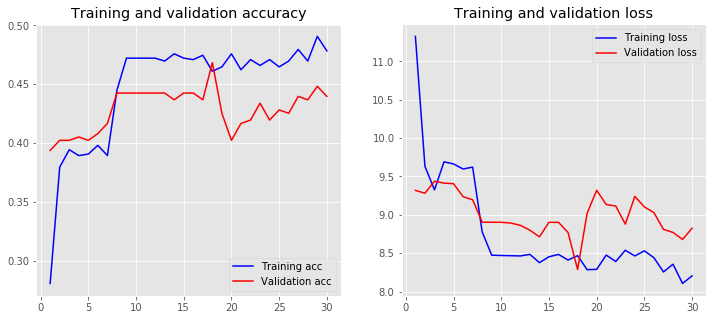

In [31]:
plot_history(history)


In [32]:
y_pred = model.predict(X_test_vec)
print(confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))
print(classification_report(y_test,np.argmax(y_pred, axis = 1)))
print(accuracy_score(y_test, np.argmax(y_pred, axis = 1)))

[[ 29 104   0   0]
 [ 30 124   0   0]
 [ 10  42   0   0]
 [  2   7   0   0]]
              precision    recall  f1-score   support

           0       0.41      0.22      0.28       133
           1       0.45      0.81      0.58       154
           2       0.00      0.00      0.00        52
           3       0.00      0.00      0.00         9

    accuracy                           0.44       348
   macro avg       0.21      0.26      0.21       348
weighted avg       0.35      0.44      0.36       348

0.4396551724137931


In [35]:
embedding_dim = 50

### Avec 3 couches Denses

In [35]:
from keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-4, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 50)            54450     
_________________________________________________________________
flatten_2 (Flatten)          (None, 2500)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 200)               500200    
_________________________________________________________________
dense_17 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 804       
Total params: 595,654
Trainable params: 595,654
Non-trainable params: 0
_________________________________________________________________


In [36]:
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=20)
history = model.fit(X_train_vec, y_train, epochs=30, verbose=2, validation_data=(X_test_vec, y_test), batch_size=10, callbacks=[rlrop])

Train on 809 samples, validate on 348 samples
Epoch 1/30
 - 1s - loss: 1.1474 - acc: 0.4363 - val_loss: 1.1150 - val_acc: 0.4425
Epoch 2/30
 - 1s - loss: 1.0894 - acc: 0.4487 - val_loss: 1.1213 - val_acc: 0.4425
Epoch 3/30
 - 1s - loss: 1.0805 - acc: 0.4710 - val_loss: 1.1123 - val_acc: 0.4397
Epoch 4/30
 - 1s - loss: 1.0745 - acc: 0.4944 - val_loss: 1.1070 - val_acc: 0.4425
Epoch 5/30
 - 1s - loss: 1.0680 - acc: 0.4969 - val_loss: 1.1209 - val_acc: 0.4425
Epoch 6/30
 - 1s - loss: 1.0559 - acc: 0.5130 - val_loss: 1.1179 - val_acc: 0.4167
Epoch 7/30
 - 1s - loss: 1.0330 - acc: 0.5464 - val_loss: 1.1035 - val_acc: 0.4626
Epoch 8/30
 - 1s - loss: 0.9903 - acc: 0.5871 - val_loss: 1.1162 - val_acc: 0.4368
Epoch 9/30
 - 1s - loss: 0.9119 - acc: 0.6440 - val_loss: 1.1254 - val_acc: 0.4626
Epoch 10/30
 - 1s - loss: 0.7830 - acc: 0.6910 - val_loss: 1.1847 - val_acc: 0.4684
Epoch 11/30
 - 1s - loss: 0.6459 - acc: 0.7565 - val_loss: 1.3930 - val_acc: 0.4109
Epoch 12/30
 - 1s - loss: 0.5432 - acc:

In [37]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  0.019835114902707347           Accuracy:  0.9938195303579785


In [38]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  2.577749485257028           Accuracy:  0.5057471284921142


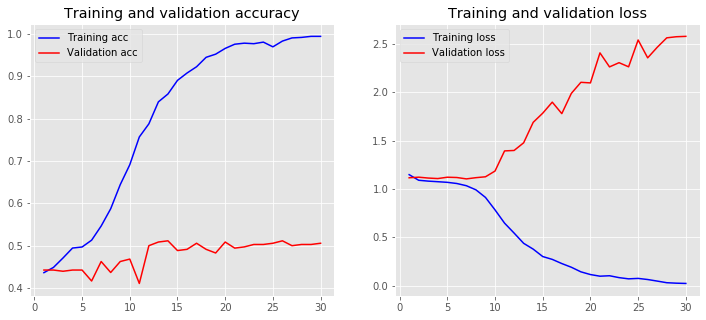

In [39]:
plot_history(history)

In [40]:
y_pred = model.predict(X_test_vec)
print(confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))
print(classification_report(y_test,np.argmax(y_pred, axis = 1)))
print(accuracy_score(y_test, np.argmax(y_pred, axis = 1)))

[[ 63  66   4   0]
 [ 40 100  14   0]
 [ 13  26  12   1]
 [  1   5   2   1]]
              precision    recall  f1-score   support

           0       0.54      0.47      0.50       133
           1       0.51      0.65      0.57       154
           2       0.38      0.23      0.29        52
           3       0.50      0.11      0.18         9

    accuracy                           0.51       348
   macro avg       0.48      0.37      0.39       348
weighted avg       0.50      0.51      0.49       348

0.5057471264367817


## RNN Simple + Pooling

In [110]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_34 (Embedding)     (None, 50, 50)            54450     
_________________________________________________________________
global_max_pooling1d_21 (Glo (None, 50)                0         
_________________________________________________________________
dense_96 (Dense)             (None, 128)               6528      
_________________________________________________________________
dense_97 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_98 (Dense)             (None, 4)                 1028      
Total params: 95,030
Trainable params: 95,030
Non-trainable params: 0
_________________________________________________________________


In [111]:
history = model.fit(X_train_vec, y_train, epochs=30, verbose=2, validation_data=(X_test_vec, y_test), batch_size=10)

Train on 809 samples, validate on 348 samples
Epoch 1/30
 - 3s - loss: 1.1501 - acc: 0.4536 - val_loss: 1.1273 - val_acc: 0.4425
Epoch 2/30
 - 0s - loss: 1.0834 - acc: 0.4561 - val_loss: 1.1062 - val_acc: 0.4425
Epoch 3/30
 - 0s - loss: 1.0821 - acc: 0.4623 - val_loss: 1.1139 - val_acc: 0.4425
Epoch 4/30
 - 0s - loss: 1.0775 - acc: 0.4907 - val_loss: 1.1096 - val_acc: 0.4425
Epoch 5/30
 - 0s - loss: 1.0678 - acc: 0.4932 - val_loss: 1.1070 - val_acc: 0.4569
Epoch 6/30
 - 0s - loss: 1.0482 - acc: 0.5192 - val_loss: 1.1011 - val_acc: 0.4511
Epoch 7/30
 - 0s - loss: 1.0257 - acc: 0.5340 - val_loss: 1.0957 - val_acc: 0.4885
Epoch 8/30
 - 0s - loss: 0.9838 - acc: 0.5810 - val_loss: 1.1205 - val_acc: 0.4684
Epoch 9/30
 - 0s - loss: 0.9396 - acc: 0.5946 - val_loss: 1.0916 - val_acc: 0.5115
Epoch 10/30
 - 0s - loss: 0.8577 - acc: 0.6588 - val_loss: 1.1127 - val_acc: 0.5259
Epoch 11/30
 - 0s - loss: 0.7876 - acc: 0.6910 - val_loss: 1.0494 - val_acc: 0.5431
Epoch 12/30
 - 0s - loss: 0.6624 - acc:

In [95]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  0.06833897930729964           Accuracy:  0.9826946848697214


In [96]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  1.858148426845156           Accuracy:  0.5632183908045977


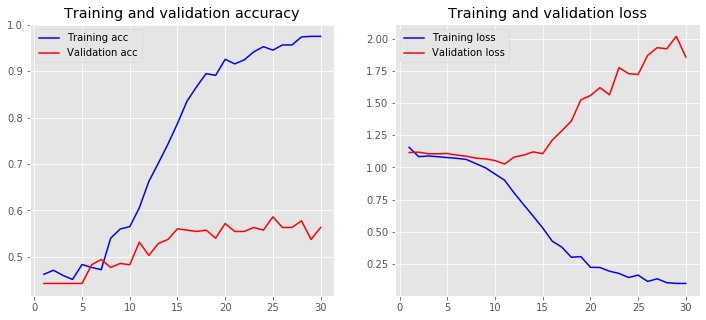

In [97]:
plot_history(history)

In [46]:
y_pred = model.predict(X_test_vec)
print(confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))
print(classification_report(y_test,np.argmax(y_pred, axis = 1)))
print(accuracy_score(y_test, np.argmax(y_pred, axis = 1)))

[[ 70  56   7   0]
 [ 30 107  17   0]
 [  4  27  19   2]
 [  0   3   3   3]]
              precision    recall  f1-score   support

           0       0.67      0.53      0.59       133
           1       0.55      0.69      0.62       154
           2       0.41      0.37      0.39        52
           3       0.60      0.33      0.43         9

    accuracy                           0.57       348
   macro avg       0.56      0.48      0.51       348
weighted avg       0.58      0.57      0.57       348

0.5718390804597702


In [102]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 50, 50)            54450     
_________________________________________________________________
global_max_pooling1d_17 (Glo (None, 50)                0         
_________________________________________________________________
dense_79 (Dense)             (None, 256)               13056     
_________________________________________________________________
dense_80 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_81 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_82 (Dense)             (None, 4)                 516       
Total params: 166,710
Trainable params: 166,710
Non-trainable params: 0
_________________________________________________________________


In [103]:
history = model.fit(X_train_vec, y_train, epochs=30, verbose=2, validation_data=(X_test_vec, y_test), batch_size=10)

Train on 809 samples, validate on 348 samples
Epoch 1/30
 - 3s - loss: 1.1420 - acc: 0.4425 - val_loss: 1.1008 - val_acc: 0.4425
Epoch 2/30
 - 1s - loss: 1.0676 - acc: 0.4574 - val_loss: 1.0899 - val_acc: 0.4425
Epoch 3/30
 - 1s - loss: 1.0252 - acc: 0.4784 - val_loss: 1.0744 - val_acc: 0.4770
Epoch 4/30
 - 0s - loss: 0.8949 - acc: 0.5859 - val_loss: 1.0813 - val_acc: 0.4914
Epoch 5/30
 - 0s - loss: 0.7203 - acc: 0.6836 - val_loss: 1.1064 - val_acc: 0.4713
Epoch 6/30
 - 0s - loss: 0.5386 - acc: 0.7787 - val_loss: 1.2408 - val_acc: 0.4799
Epoch 7/30
 - 0s - loss: 0.4280 - acc: 0.8356 - val_loss: 1.2859 - val_acc: 0.5201
Epoch 8/30
 - 0s - loss: 0.3241 - acc: 0.8665 - val_loss: 1.6543 - val_acc: 0.5057
Epoch 9/30
 - 0s - loss: 0.2444 - acc: 0.9135 - val_loss: 1.7330 - val_acc: 0.4971
Epoch 10/30
 - 0s - loss: 0.2206 - acc: 0.9147 - val_loss: 1.9527 - val_acc: 0.5287
Epoch 11/30
 - 1s - loss: 0.1833 - acc: 0.9370 - val_loss: 1.9315 - val_acc: 0.5172
Epoch 12/30
 - 0s - loss: 0.1213 - acc:

## RNN + LSTM

### Avec 1 couche Bidirectionnelle

In [65]:
#from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4)
])

sgd = SGD(lr=0.01, decay=1e-4, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

In [66]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

In [67]:
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)
history = model.fit(X_train_vec, y_train, epochs=30, verbose=2, validation_data=(X_test_vec, y_test), batch_size=10)

Train on 809 samples, validate on 348 samples
Epoch 1/30
809/809 - 57s - loss: 1.1231 - acc: 0.4722 - val_loss: 1.0969 - val_acc: 0.4626
Epoch 2/30
809/809 - 39s - loss: 1.0178 - acc: 0.5451 - val_loss: 1.0535 - val_acc: 0.4971
Epoch 3/30
809/809 - 37s - loss: 0.8412 - acc: 0.6230 - val_loss: 0.9968 - val_acc: 0.5115
Epoch 4/30
809/809 - 38s - loss: 0.6434 - acc: 0.7256 - val_loss: 1.1486 - val_acc: 0.5431
Epoch 5/30
809/809 - 37s - loss: 0.5534 - acc: 0.7738 - val_loss: 1.1230 - val_acc: 0.5000
Epoch 6/30
809/809 - 38s - loss: 0.4468 - acc: 0.8133 - val_loss: 1.2883 - val_acc: 0.5431
Epoch 7/30
809/809 - 38s - loss: 0.3777 - acc: 0.8455 - val_loss: 1.2933 - val_acc: 0.5230
Epoch 8/30
809/809 - 39s - loss: 0.3126 - acc: 0.8714 - val_loss: 1.3854 - val_acc: 0.5230
Epoch 9/30
809/809 - 41s - loss: 0.2919 - acc: 0.8727 - val_loss: 1.6417 - val_acc: 0.5230
Epoch 10/30
809/809 - 40s - loss: 0.2303 - acc: 0.9073 - val_loss: 1.6731 - val_acc: 0.5259
Epoch 11/30
809/809 - 40s - loss: 0.1904 - 

In [62]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  0.2286912137630991           Accuracy:  0.9097651


In [63]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  2.1613319358606446           Accuracy:  0.54310346


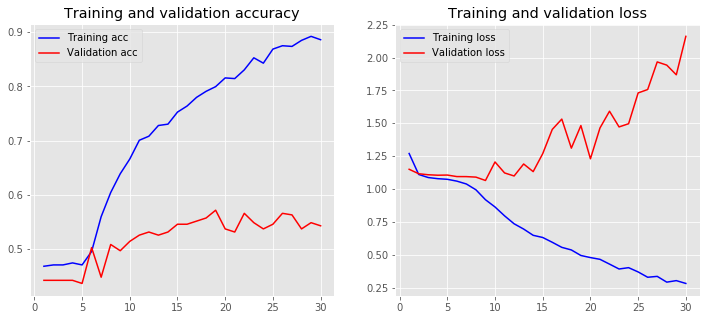

In [64]:
plot_history(history)

In [36]:
y_pred = model.predict(X_test_vec)
print(confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))
print(classification_report(y_test,np.argmax(y_pred, axis = 1)))
print(accuracy_score(y_test, np.argmax(y_pred, axis = 1)))

[[ 72  59   2   0]
 [ 40 105   9   0]
 [  8  26  18   0]
 [  0   5   4   0]]
              precision    recall  f1-score   support

           0       0.60      0.54      0.57       133
           1       0.54      0.68      0.60       154
           2       0.55      0.35      0.42        52
           3       0.00      0.00      0.00         9

    accuracy                           0.56       348
   macro avg       0.42      0.39      0.40       348
weighted avg       0.55      0.56      0.55       348

0.5603448275862069


### Avec deux couches Bidirectionnelles

In [37]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4)
])

In [38]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_vec, y_train, epochs=30, verbose=2, validation_data=(X_test_vec, y_test), batch_size=10)

Train on 809 samples, validate on 348 samples
Epoch 1/30
809/809 - 26s - loss: 1.3095 - acc: 0.4227 - val_loss: 1.1687 - val_acc: 0.4425
Epoch 2/30
809/809 - 20s - loss: 1.1394 - acc: 0.4524 - val_loss: 1.1258 - val_acc: 0.4425
Epoch 3/30


In [ ]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

In [ ]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

In [ ]:
plot_history(history)

In [ ]:
y_pred = model.predict(X_test_vec)
print(confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))
print(classification_report(y_test,np.argmax(y_pred, axis = 1)))
print(accuracy_score(y_test, np.argmax(y_pred, axis = 1)))

## CNN

### Avec 2 coucheS de Convolution

In [51]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen, 
                    #embeddings_initializer = Constant(embedding_matrix),
#                    weights=[embedding_matrix], 
                    trainable=False))
model.add(Dropout(0.2))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_vec, y_train,
          epochs=50,
          validation_data=(X_test_vec, y_test))
print(model.summary())

Train on 809 samples, validate on 348 samples
Epoch 1/50
809/809 [==============================] - 4s 5ms/step - loss: 1.2183 - acc: 0.4574 - val_loss: 1.1245 - val_acc: 0.4425
Epoch 2/50
809/809 [==============================] - 1s 636us/step - loss: 1.0933 - acc: 0.4487 - val_loss: 1.1136 - val_acc: 0.4425
Epoch 3/50
809/809 [==============================] - 1s 697us/step - loss: 1.0825 - acc: 0.4710 - val_loss: 1.1100 - val_acc: 0.4397
Epoch 4/50
809/809 [==============================] - 1s 712us/step - loss: 1.0812 - acc: 0.4784 - val_loss: 1.1141 - val_acc: 0.4425
Epoch 5/50
809/809 [==============================] - 1s 728us/step - loss: 1.0813 - acc: 0.4722 - val_loss: 1.1094 - val_acc: 0.4368
Epoch 6/50
809/809 [==============================] - 1s 687us/step - loss: 1.0733 - acc: 0.4784 - val_loss: 1.1115 - val_acc: 0.4425
Epoch 7/50
809/809 [==============================] - 1s 889us/step - loss: 1.0749 - acc: 0.4808 - val_loss: 1.1132 - val_acc: 0.4425
Epoch 8/50
809/809

In [52]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  0.23139825334360337           Accuracy:  0.9332509270704573


In [53]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  1.4066396540608899           Accuracy:  0.5402298843723604


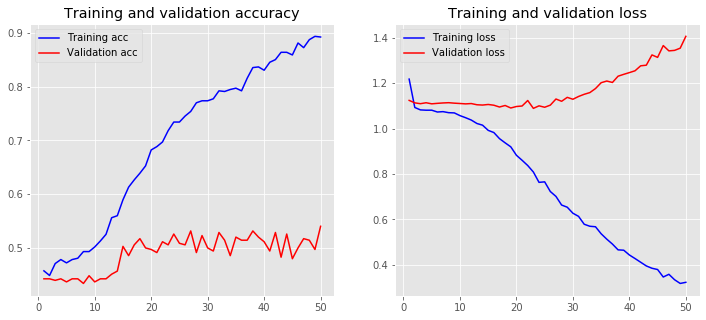

In [54]:
plot_history(history)

In [55]:
y_pred = model.predict(X_test_vec)
print(confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))
print(classification_report(y_test,np.argmax(y_pred, axis = 1)))
print(accuracy_score(y_test, np.argmax(y_pred, axis = 1)))

[[ 69  63   1   0]
 [ 31 112  11   0]
 [ 13  32   7   0]
 [  2   5   2   0]]
              precision    recall  f1-score   support

           0       0.60      0.52      0.56       133
           1       0.53      0.73      0.61       154
           2       0.33      0.13      0.19        52
           3       0.00      0.00      0.00         9

    accuracy                           0.54       348
   macro avg       0.37      0.35      0.34       348
weighted avg       0.51      0.54      0.51       348

0.5402298850574713


### Avec 1 couche de Convolution

In [56]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen, 
                    #embeddings_initializer = Constant(embedding_matrix),
#                    weights=[embedding_matrix], 
                    trainable=False))
model.add(Dropout(0.2))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
#model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
#model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_vec, y_train,
          epochs=50,
          validation_data=(X_test_vec, y_test))
print(model.summary())

Train on 809 samples, validate on 348 samples
Epoch 1/50
809/809 [==============================] - 2s 3ms/step - loss: 1.1556 - acc: 0.4747 - val_loss: 1.1153 - val_acc: 0.3793
Epoch 2/50
809/809 [==============================] - 0s 587us/step - loss: 1.0942 - acc: 0.4425 - val_loss: 1.1094 - val_acc: 0.4425
Epoch 3/50
809/809 [==============================] - 0s 545us/step - loss: 1.0778 - acc: 0.4771 - val_loss: 1.1068 - val_acc: 0.4569
Epoch 4/50
809/809 [==============================] - 0s 539us/step - loss: 1.0696 - acc: 0.4969 - val_loss: 1.1102 - val_acc: 0.4454
Epoch 5/50
809/809 [==============================] - 0s 520us/step - loss: 1.0635 - acc: 0.4981 - val_loss: 1.1061 - val_acc: 0.4454
Epoch 6/50
809/809 [==============================] - 0s 553us/step - loss: 1.0535 - acc: 0.5253 - val_loss: 1.1060 - val_acc: 0.4454
Epoch 7/50
809/809 [==============================] - 0s 513us/step - loss: 1.0437 - acc: 0.5303 - val_loss: 1.1042 - val_acc: 0.4454
Epoch 8/50
809/809

In [57]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  0.2859970300984471           Accuracy:  0.9406674908766494


In [58]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  1.101849191490261           Accuracy:  0.5258620693080727


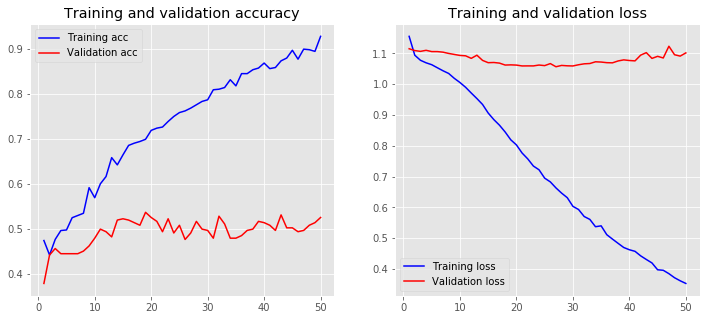

In [59]:
plot_history(history)

In [60]:
y_pred = model.predict(X_test_vec)
print(confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))
print(classification_report(y_test,np.argmax(y_pred, axis = 1)))
print(accuracy_score(y_test, np.argmax(y_pred, axis = 1)))

[[ 68  64   1   0]
 [ 40 106   8   0]
 [ 13  30   8   1]
 [  1   7   0   1]]
              precision    recall  f1-score   support

           0       0.56      0.51      0.53       133
           1       0.51      0.69      0.59       154
           2       0.47      0.15      0.23        52
           3       0.50      0.11      0.18         9

    accuracy                           0.53       348
   macro avg       0.51      0.37      0.38       348
weighted avg       0.52      0.53      0.50       348

0.5258620689655172
